In [2]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
df=pd.read_csv('cleaned_data.csv')
print(df.columns)
X_train,X_test,y_train,y_test=train_test_split(df.drop(['EDUCATION','default payment next month','EDUCATION_CAT','ID'],axis=1),df['default payment next month'],test_size=0.3,random_state=21,stratify=df['default payment next month'])
X_train_ed,X_test_ed,y_train_ed,y_test_ed=train_test_split(df.drop(['default payment next month','EDUCATION_CAT','ID'],axis=1),df['default payment next month'],test_size=0.3,random_state=21,stratify=df['default payment next month'])

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [25]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg_ed=LogisticRegression()
log_reg_ed.fit(X_train_ed,y_train_ed)

C:\Users\agoel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\agoel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [21]:
y_pred=log_reg.predict_proba(X_test)
print(y_pred)

<class 'numpy.ndarray'>


_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [27]:
from sklearn.metrics import roc_auc_score
y_pred_prob=log_reg.predict_proba(X_test)[:,1]
score=roc_auc_score(y_test,y_pred_prob)
print(score)
y_pred_prob_ed=log_reg_ed.predict_proba(X_test_ed)[:,1]
score_ed=roc_auc_score(y_test_ed,y_pred_prob_ed)
print(score_ed)

0.6298974986156537
0.6325925828009319


_________________________________________________________________________
**Now, plot the ROC curve.**


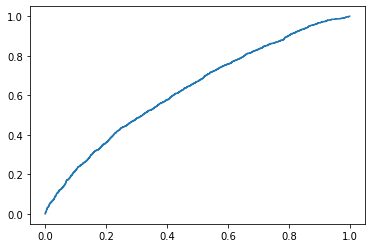

In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='LOGISTIC REGRESSION')
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [37]:
from sklearn.metrics import precision_recall_curve
p,r,thresholds=precision_recall_curve(y_test,y_pred_prob)
print('Precision:',p)
print('Recall:',r)

Precision: [0.22202753 0.22193015 0.22195794 ... 0.5        0.         1.        ]
Recall: [1.00000000e+00 9.99436302e-01 9.99436302e-01 ... 5.63697858e-04
 0.00000000e+00 0.00000000e+00]


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


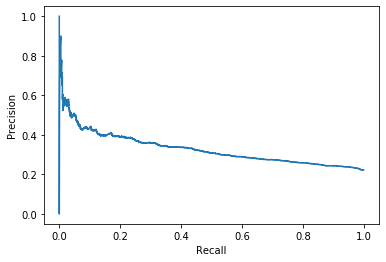

In [38]:
plt.plot(r,p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [44]:
from sklearn.metrics import auc
score_1=auc(r,p)
print(score_1)

0.3289028837918414


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [42]:
y_pred_prob_train=log_reg.predict_proba(X_train)[:,1]
score_train=roc_auc_score(y_train,y_pred_prob_train)
print(score_train)

0.6619061386982998


    How is this different, conceptually and quantitatively, from your earlier calculation?
